### This is a playground to experiment code

In [72]:
import math
import numpy as np
import matplotlib.pyplot as plt
from dot import viz

from typing import Union

In [4]:
a = 5
b = 9
c = 10

y = a * b + c

print(y)

55


In [46]:
class Value:
    # data should be simple numeric value (e.g. int or float)
    def __init__(self, data, prevs=[], ops='', label=''):
        self.data = data
        self.prevs = prevs
        self.ops = ops
        self.grad = 0.0
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return str(f'Value(data: {self.data})')

    def __str__(self):
        return self.__repr__()

    def __add__(self, other):
        result = Value(self.data + other.data, [self, other], '+')

        def add_backward():
            self.grad += 1.0 * result.grad
            other.grad += 1.0 * result.grad
        result._backward = add_backward
        return result

    def __mul__(self, other):
        result = Value(self.data * other.data, [self, other], '*')

        def mul_backward():
            self.grad += other.data * result.grad
            other.grad += self.data * result.grad
        result._backward = mul_backward

        return result

    def backward(self):
        self.grad = 1.0
        visited = set()

        def DFS(root):
            if root in visited:
                return
            root._backward()
            visited.add(root)
            for prev in root.prevs:
                DFS(prev)
        DFS(self)

    def id(self):
        return str(id(self))

In [47]:
a = Value(5, label='a')
b = Value(9, label='b')
c = Value(10, label='c')
d = a * b
d.label = 'd'
y = d + c
y.label = 'y'

y.backward()

print(y)

Value(data: 55)


In [74]:
dot = viz.generate_graph(y)
dot

NameError: name 'viz' is not defined

In [60]:
a.data -= 0.1 * a.grad
b.data -= 0.1 * b.grad

d = a * b
y = d + c

print(y.data)

-7.400000000000002


### Helper to visualize the computation graph

In [35]:
def trace(root):
    nodes = []
    edges = []

    def DFS(node):
        if node in nodes:
            return
        nodes.append(node)
        for prev in node.prevs:
            edges.append((prev, node))
            DFS(prev)
    DFS(root)
    return nodes, edges


print(trace(y))

([Value(data: 55), Value(data: 45), Value(data: 5), Value(data: 9), Value(data: 10)], [(Value(data: 45), Value(data: 55)), (Value(data: 5), Value(data: 45)), (Value(data: 9), Value(data: 45)), (Value(data: 10), Value(data: 55))])


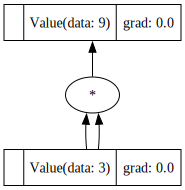

In [13]:
a = Value(3)

b = a * a

dot = generate_graph(*trace(b))
dot

In [67]:
a = Value(3.0, label='a')
b = Value(4.0, label='b')
c = Value(5.0, label='c')

y = a * a * a + b + a * c

y.backward()

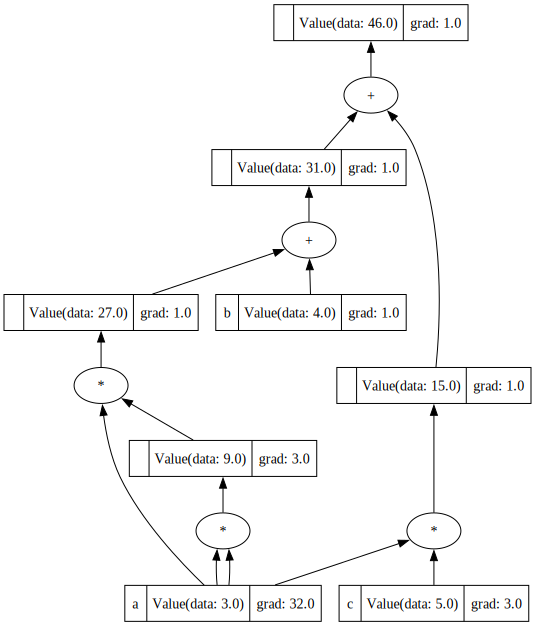

In [69]:
dot = generate_graph(*trace(y))
dot